# Visual Data Analysis

## Visual data analysis in Python. Part 1. Visualization: from Simple Distributions to Dimensionality Reduction

### Dataset

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [3]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [4]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### Univariate visualization

Univariate analysis looks at one feature at a time.

#### Quantitative features

##### Histograms and density plots

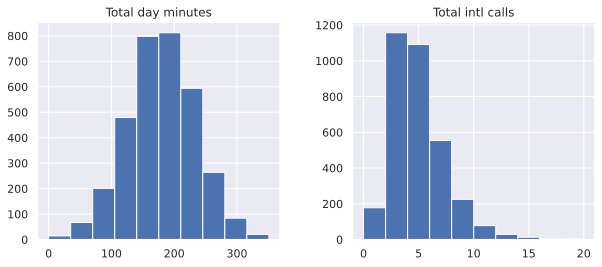

In [5]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

##### Kernel Density Plot

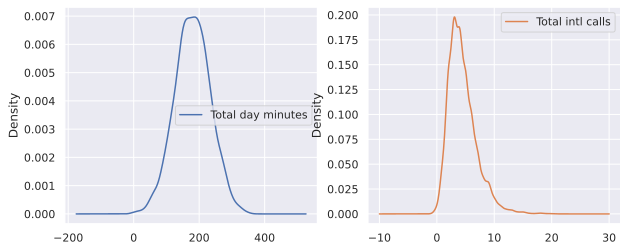

In [6]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

##### Displot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


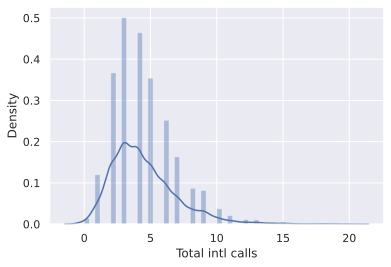

In [7]:
sns.distplot(df["Total intl calls"]);

##### Box plot

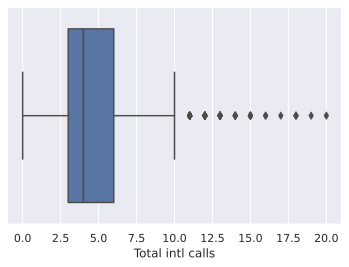

In [8]:
sns.boxplot(x="Total intl calls", data=df)

##### Violin plot

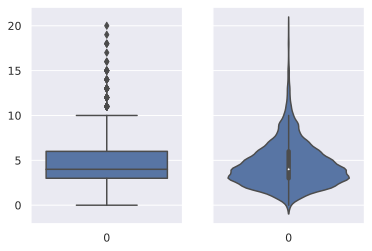

In [9]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

##### describe()

In [10]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

#### Categorical and binary features

##### Frequency table

In [11]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

##### Bar plot

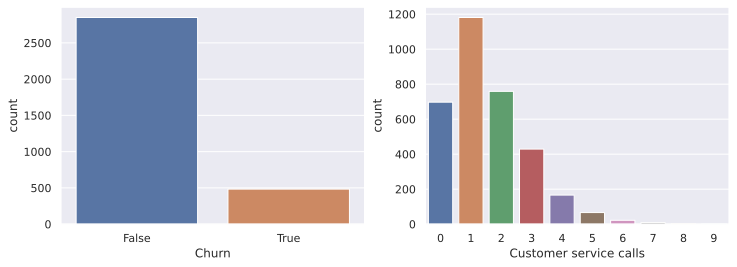

In [12]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

### Multivariate visualization

Multivariate plots allow us to see relationships between two and more different variables, all in one figure.

#### Quantitative vs. Quantitative

##### Correlation matrix

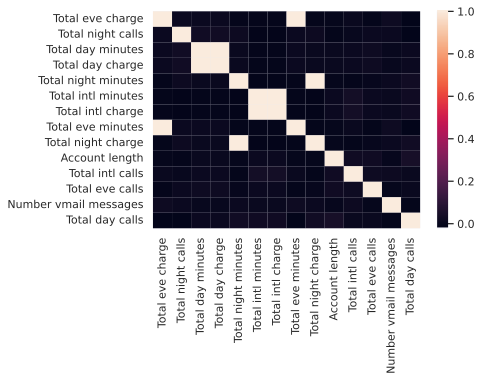

In [13]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [14]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

##### Scatter plot

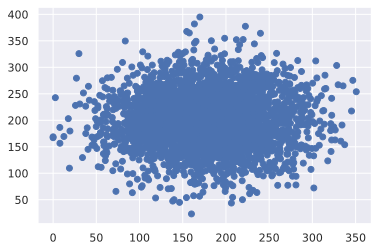

In [15]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

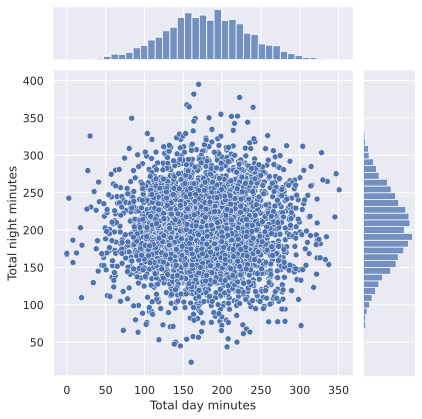

In [16]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter")

##### Joint plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


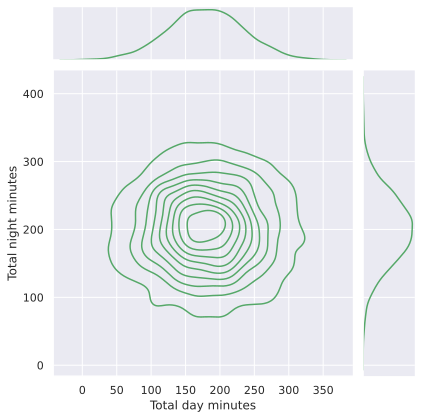

In [17]:
sns.jointplot(
    "Total day minutes", "Total night minutes", data=df, kind="kde", color="g"
)

##### Scatterplot matrix

In [18]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# %config InlineBackend.figure_format = 'svg'

#### Quantitative vs. Categorical

##### lmplot (scatter plot with colors)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


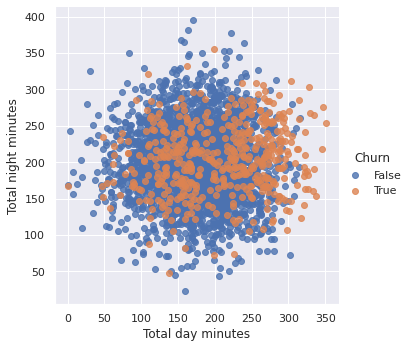

In [20]:
sns.lmplot(
    "Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False
)

##### Box plot for disjoint groups

In [21]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

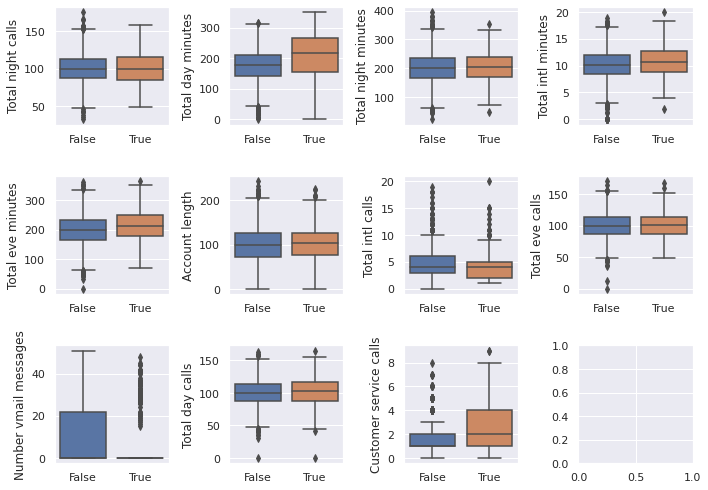

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

##### Box and violin plots

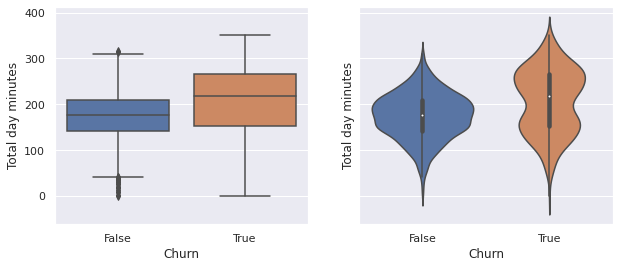

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

##### Catplot

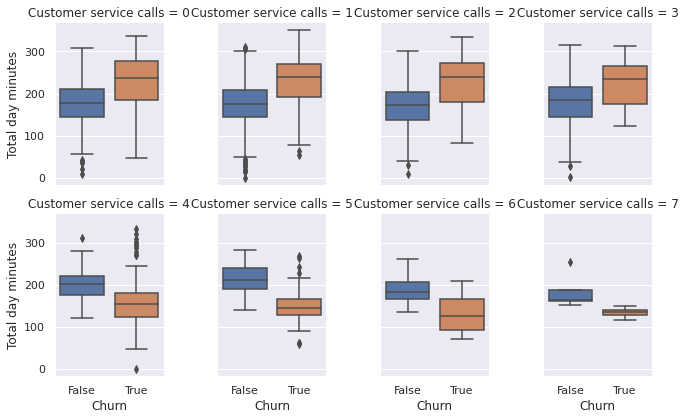

In [24]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
)

#### Categorical vs. Categorical

##### Count plot

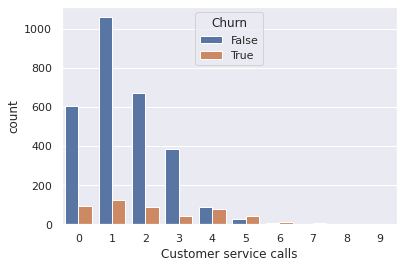

In [25]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

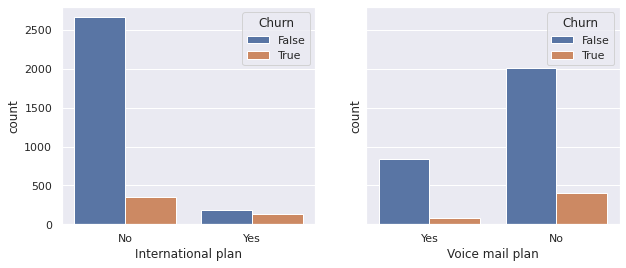

In [26]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1])

##### Contingency table or cross tabulation

In [27]:
pd.crosstab(df["State"], df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [28]:
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

### Whole dataset visualizations

##### Manifold Learning - t-SNE

Manifold learning is a class of techniques for dimensionality reduction, a way to take a high-dimensional dataset and represent it in a lower-dimensional space while preserving certain properties of the data. One popular method for manifold learning is t-Distributed Stochastic Neighbor Embedding (t-SNE).

t-SNE is a nonlinear dimensionality reduction method that is particularly well-suited for visualizing high-dimensional data. It works by preserving the local structure of the data, meaning that nearby points in the high-dimensional space are likely to be represented by nearby points in the low-dimensional space. t-SNE accomplishes this by minimizing the divergence between a distribution of points in the high-dimensional space and their corresponding points in the low-dimensional space.

The basic idea behind t-SNE is to compute the probability that two points in the high-dimensional space are neighbors (i.e., close together), and then to compute the corresponding probability for the points in the low-dimensional space. t-SNE tries to minimize the difference between these two probabilities.

In [29]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [30]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 55.8 s, sys: 397 ms, total: 56.2 s
Wall time: 29.4 s


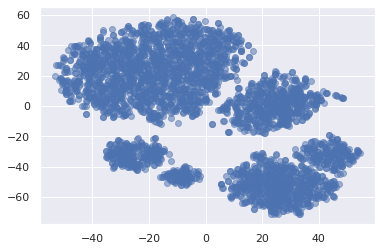

In [33]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

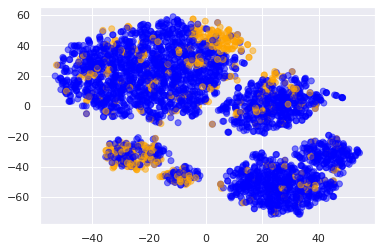

In [34]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
)

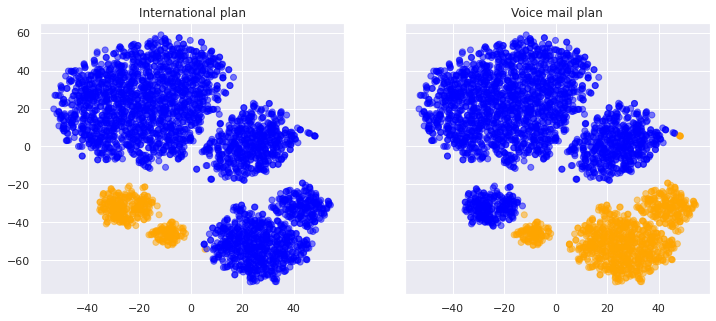

In [35]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name)

##Visual data analysis in Python. Part 2. Overview of Seaborn, Matplotlib and Plotly libraries

### Dataset

In [36]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

In [37]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [38]:
df = pd.read_csv(DATA_URL + "video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [40]:
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [41]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii             2006    Sports         82.53   
2         Mario Kart Wii      Wii             2008    Racing         35.52   
3      Wii Sports Resort      Wii             2009    Sports         32.77   
6  New Super Mario Bros.       DS             2006  Platform         29.80   
7               Wii Play      Wii             2006      Misc         28.92   

   Critic_Score  Critic_Count  User_Score  User_Count Rating  
0          76.0            51         8.0         322      E  
2          82.0            73         8.3         709      E  
3          80.0            73         8.0         192      E  
6          89.0            65         8.5         431      E  
7          58.0            41         6.6         129      E

#### DataFrame.plot()

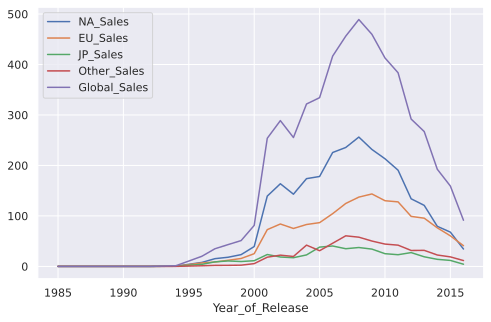

In [42]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot();

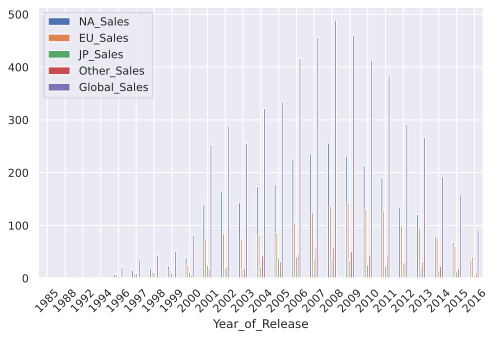

In [43]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45);

### Seaborn

#### pairplot()

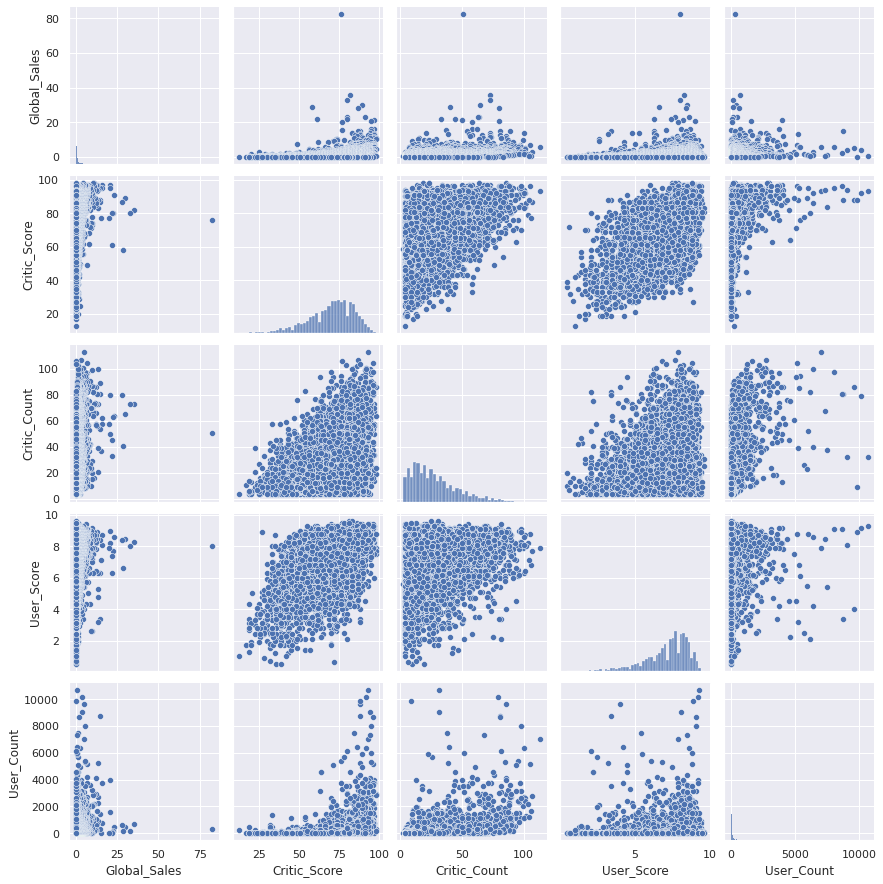

In [44]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

#### distplot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


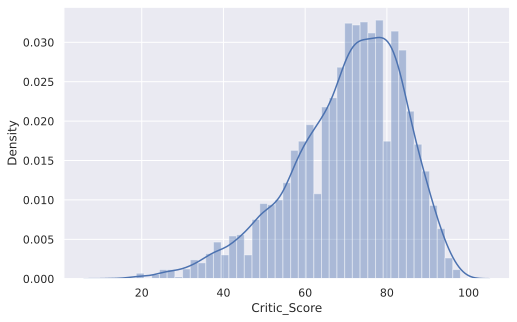

In [45]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df["Critic_Score"]);

#### jointplot()

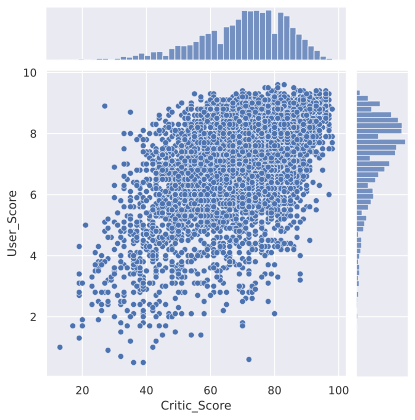

In [46]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter")

#### boxplot()

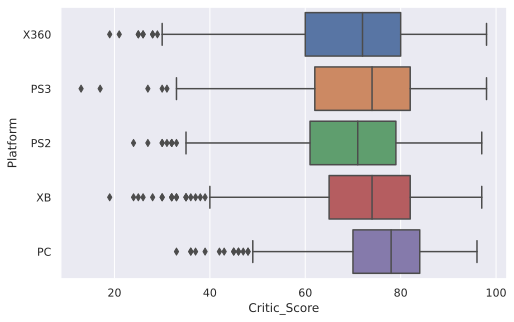

In [47]:
top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h",
);

#### heatmap()

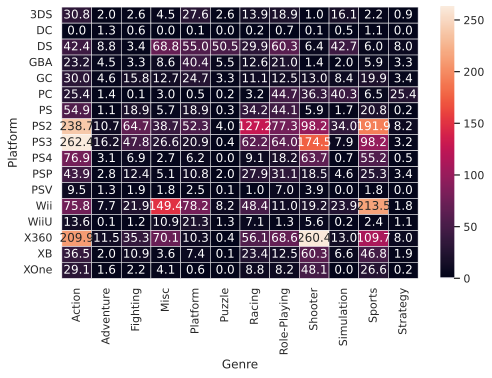

In [48]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

### Ploty

In [49]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

init_notebook_mode(connected=True)

def plotly_depict_figure_as_iframe(fig, title="", width=800, height=500,
  plot_path='../../_static/plotly_htmls/'):
  """
  This is a helper method to visualizae PLotly plots as Iframes in a Jupyter book.
  If you are running `jupyter-notebook`, you can just use iplot(fig).
  """

  # in a Jupyter Notebook, the following should work
  #iplot(fig, show_link=False)

  # in a Jupyter Book, we save a plot offline and then render it with IFrame
  fig_path_path = f"{plot_path}/{title}.html"
  plot(fig, filename=fig_path_path, show_link=False, auto_open=False);
  display(IFrame(fig_path_path, width=width, height=height))

#### Line plot

In [50]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

In [ ]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released"
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {"title": "Statistics for video games"}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)

# in a Jupyter Notebook, the following should work
iplot(fig, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
# plotly_depict_figure_as_iframe(fig, title="topic2_part2_plot1")

In [55]:
# As an option, you can save the plot in an html file:
# commented out as it produces a large in size file
# plotly.offline.plot(fig, filename="years_stats.html", show_link=False, auto_open=False);

#### Bar chart

In [56]:
# Do calculations and prepare the dataset
platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [60]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index, y=platforms_df["Global_Sales"], name="Global Sales"
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df["Number_of_Games"],
    name="Number of games released",
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {"title": "Market share by gaming platform"}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
# in a Jupyter Notebook, the following should work
iplot(fig, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
# plotly_depict_figure_as_iframe(fig, title="topic2_part2_plot2")

In [ ]:
# As an option, you can save the plot in an html file:
# commented out as it produces a large in size file
#plotly.offline.plot(fig, filename="years_stats.html", show_link=False, auto_open=False);

#### Box plot

In [ ]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

# Visualize
# in a Jupyter Notebook, the following should work
iplot(data, show_link=False)

# in a Jupyter Book, we save a plot offline and then render it with IFrame
# plotly_depict_figure_as_iframe(data, title="topic2_part2_plot3")

## Assignment #2 (demo). Analyzing cardiovascular disease data.


Problem - Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

### Part 1. Preliminary data analysis

In [1]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

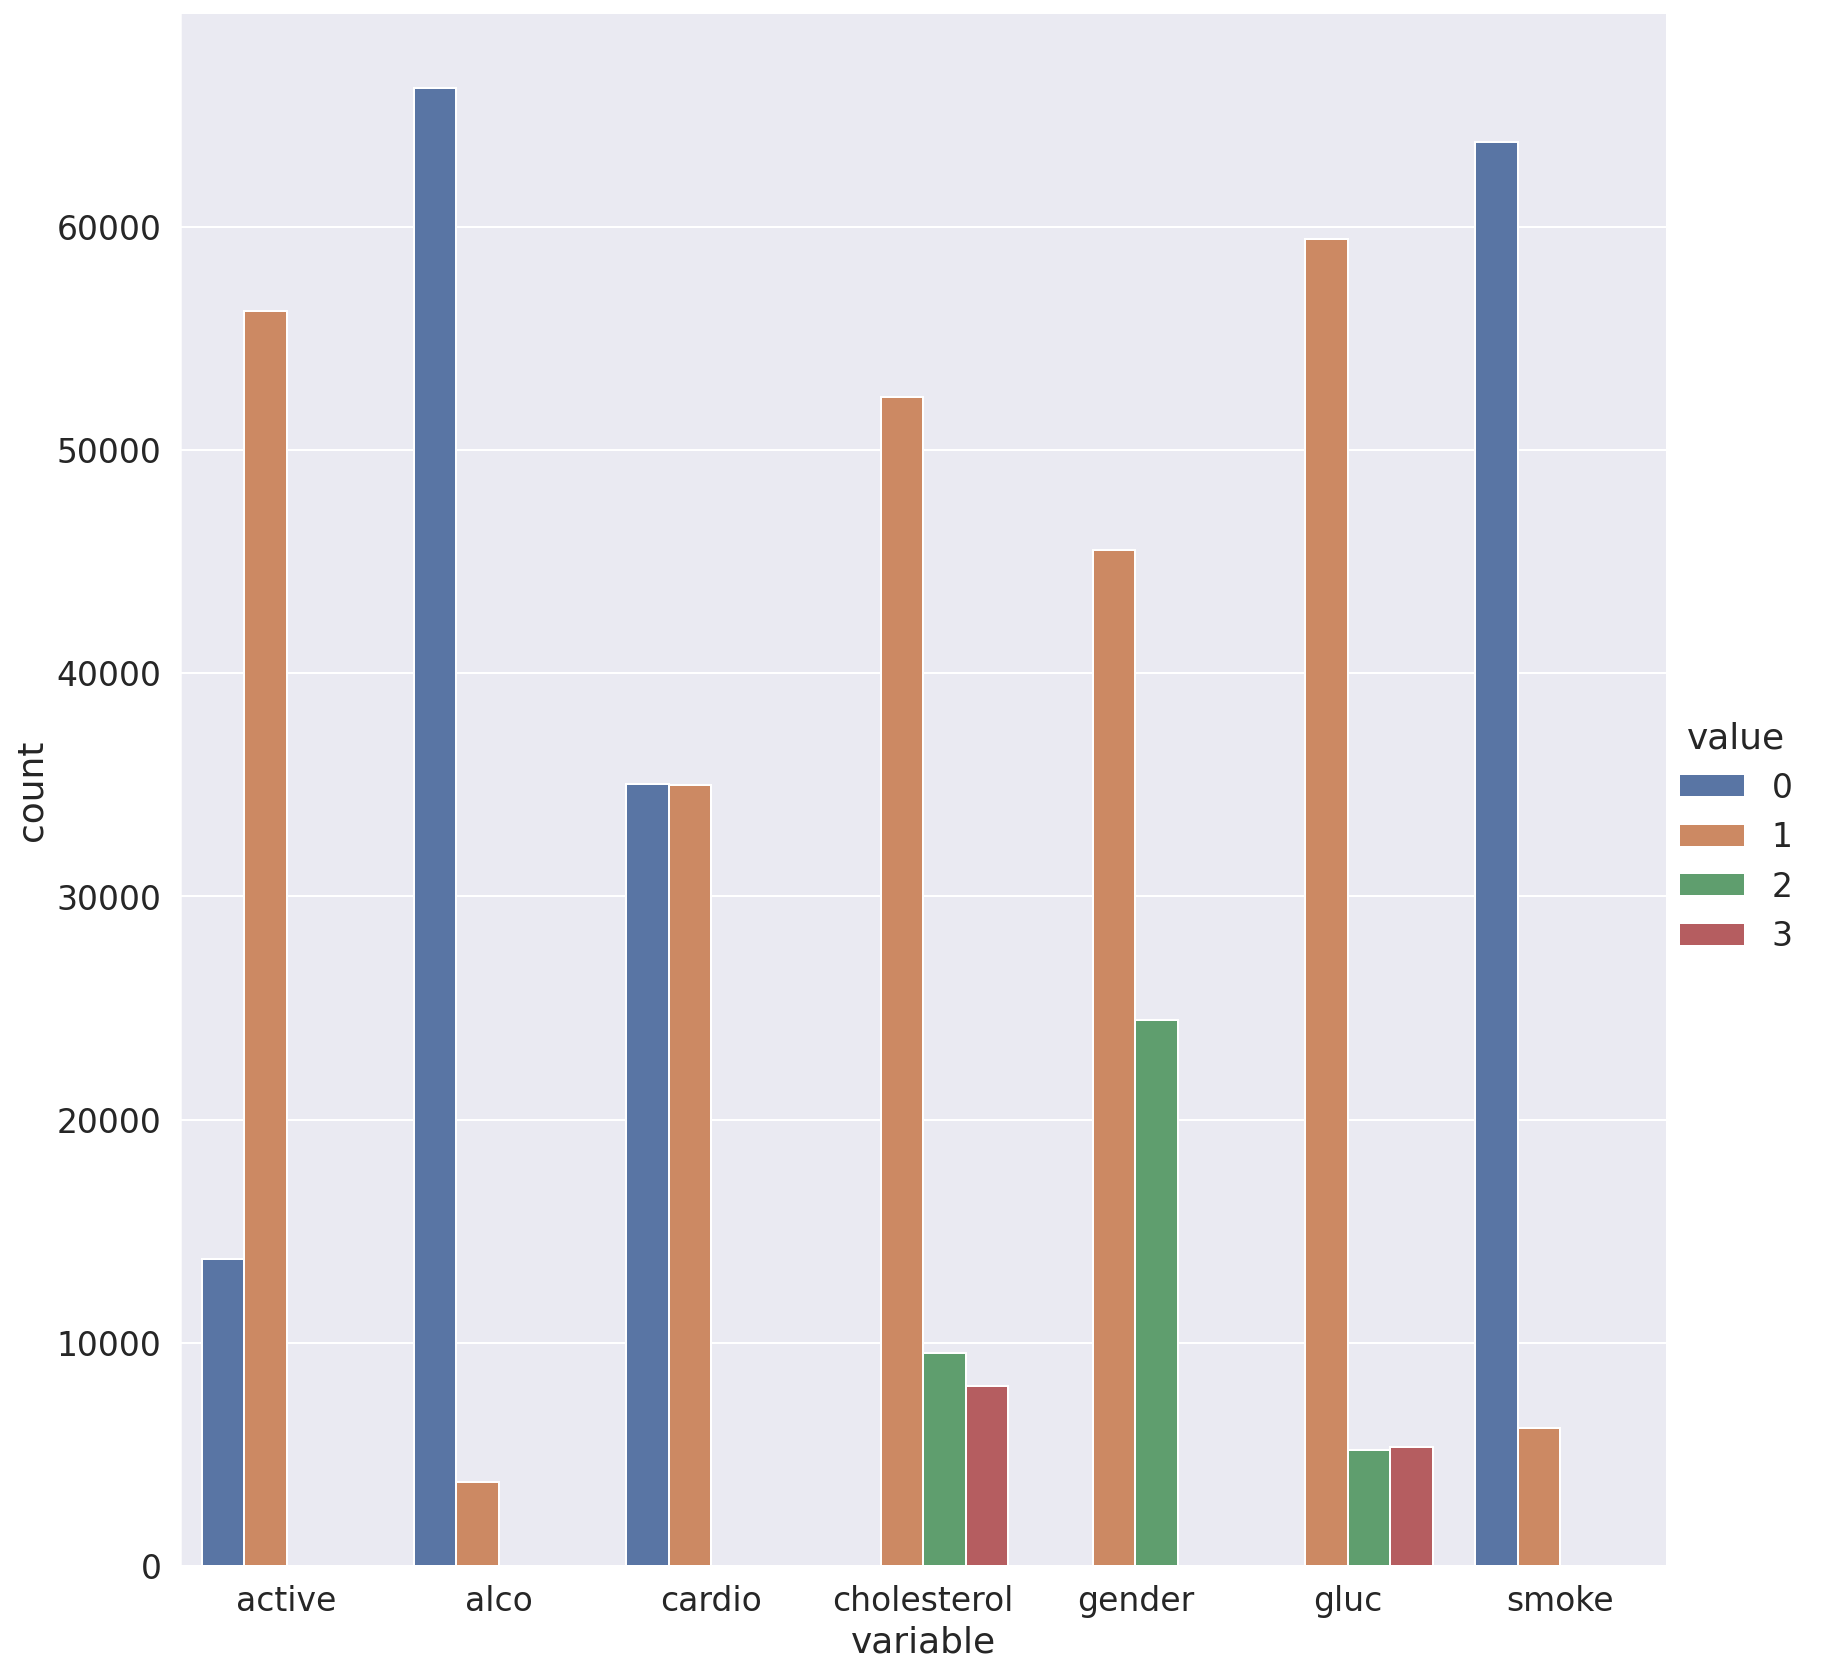

In [5]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.factorplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", size=12
);

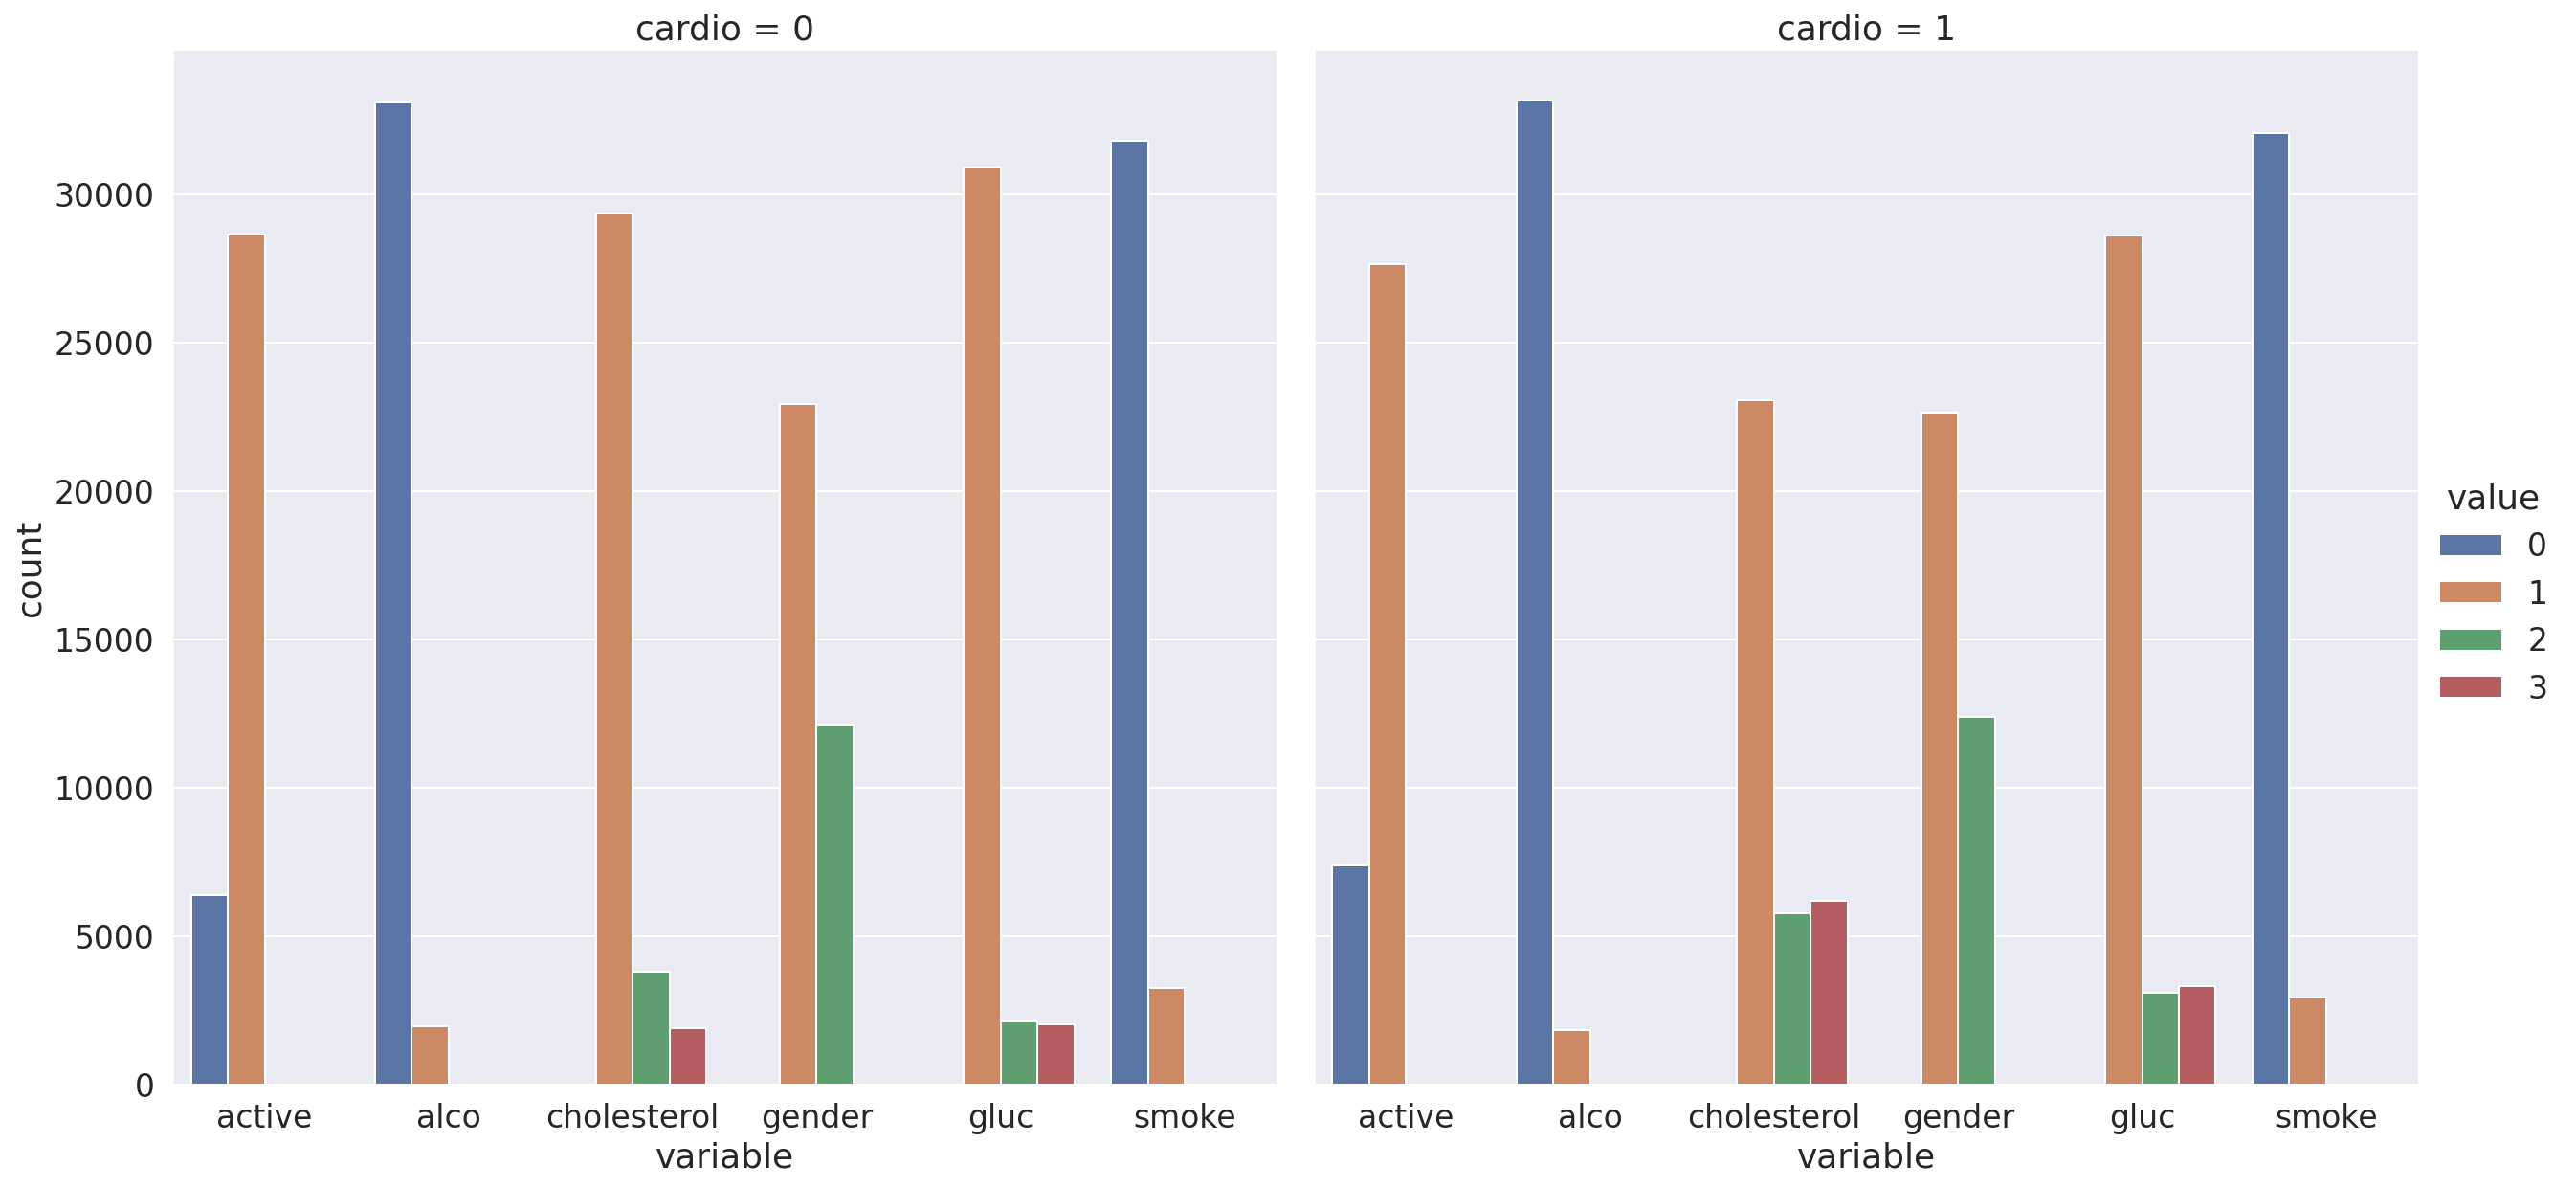

In [6]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.factorplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
    size=9,
);

In [ ]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

#### 1.1. Basic observations

Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

1. 45530 women and 24470 men (true)
2. 45530 men and 24470 women
3. 45470 women and 24530 men
4. 45470 men and 24530 women

Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

1. women
2. men (true)

In [8]:
df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [9]:
new_i = pd.DataFrame()
new_i["mean"] = df.groupby(["gender"])["height"].agg([np.mean]).sort_values(by="mean", ascending=False)
new_i["max"] = df.groupby(["gender"])["height"].max()
new_i["min"] = df.groupby(["gender"])["height"].min()
new_i["alco"] = df.groupby(["gender"])["alco"].mean()
new_i

mean  max  min      alco
gender                                
2       169.947895  207   65  0.106375
1       161.355612  250   55  0.025500

Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?

1. 4

2. 16

3. 20 (true)

4. 24

In [10]:
smokers = pd.DataFrame()
smokers["smokers"] = df.groupby(["gender"])["smoke"].value_counts(normalize=True)
smokers

smokers
gender smoke          
1      0      0.982144
       1      0.017856
2      0      0.781120
       1      0.218880

Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

1. 5
2. 10
3. 15
4. 20 (true)

In [11]:
df.groupby("smoke")["age"].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [12]:
(
    df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median()
) / 365.25 * 12

19.613963039014372

#### 1.2. Risk maps

Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?
1. 1
2. 2
3. 3 (true)
4. 4

In [37]:
df["age_years"] = (df["age"] / 365.25).round(0)

In [38]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]

In [39]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

0.2631578947368421

In [40]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
]["cardio"].mean()

0.8636363636363636

#### 1.3. Analyzing BMI

Question 1.6. (2 points). Choose the correct statements:

1. Median BMI in the sample is within boundaries of normal values.

2. Women’s BMI is on average higher then men’s. (true)

3. Healthy people have higher median BMI than ill people.

4. In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women (true)

In [42]:
df["BMI"] = (df["weight"] / (df["height"] / 100) ** 2)

In [44]:
df["BMI"].median()

26.374068120774975

In [47]:
df.groupby("gender")["BMI"].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [48]:
df.groupby(["gender", "alco", "cardio"])["BMI"].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

#### 1.4. Cleaning data

Filter out the following patient segments (we consider these as erroneous data)

* diastolic pressure is higher than systolic

* height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)

* height is strictly more than 97.5 percentile

* weight is strictly less than 2.5 percentile

* weight is strictly more than 97.5 percentile

Question 1.7. (2 points). What percent of the original data (rounded) did we filter out in the previous step?

1. 8

2. 9

3. 10 (true)

4. 11

In [64]:
# print(df.shape)
# df_clean = df[df["ap_lo"] < df["ap_hi"]]

# q = df["height"].quantile(0.025)
# df_clean = df_clean[df_clean["height"] > q]

# q2 = df["height"].quantile(0.975)
# df_clean = df_clean[df_clean["height"] < q2]

# q3 = df["weight"].quantile(0.025)
# df_clean = df_clean[df_clean["weight"] > q3]

# q4 = df["weight"].quantile(0.975)
# df_clean = df_clean[df_clean["weight"] < q4]
# print(df_clean.shape)

(70000, 15)
(61203, 15)


In [74]:
# 100 - (df_clean.shape[0] / df.shape[0] * 100)

12.567142857142855

In [75]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
print(df_to_remove.shape[0] / df.shape[0])

filtered_df = df[~df.index.isin(df_to_remove)]

0.0963


### Part 2. Visual data analysis 

#### 2.1. Correlation matrix visualization

Question 2.1. (1 point). Which pair of features has the strongest Pearson’s correlation with the gender feature?

1. Cardio, Cholesterol

2. Height, Smoke

3. Smoke, Alco

4. Height, Weight

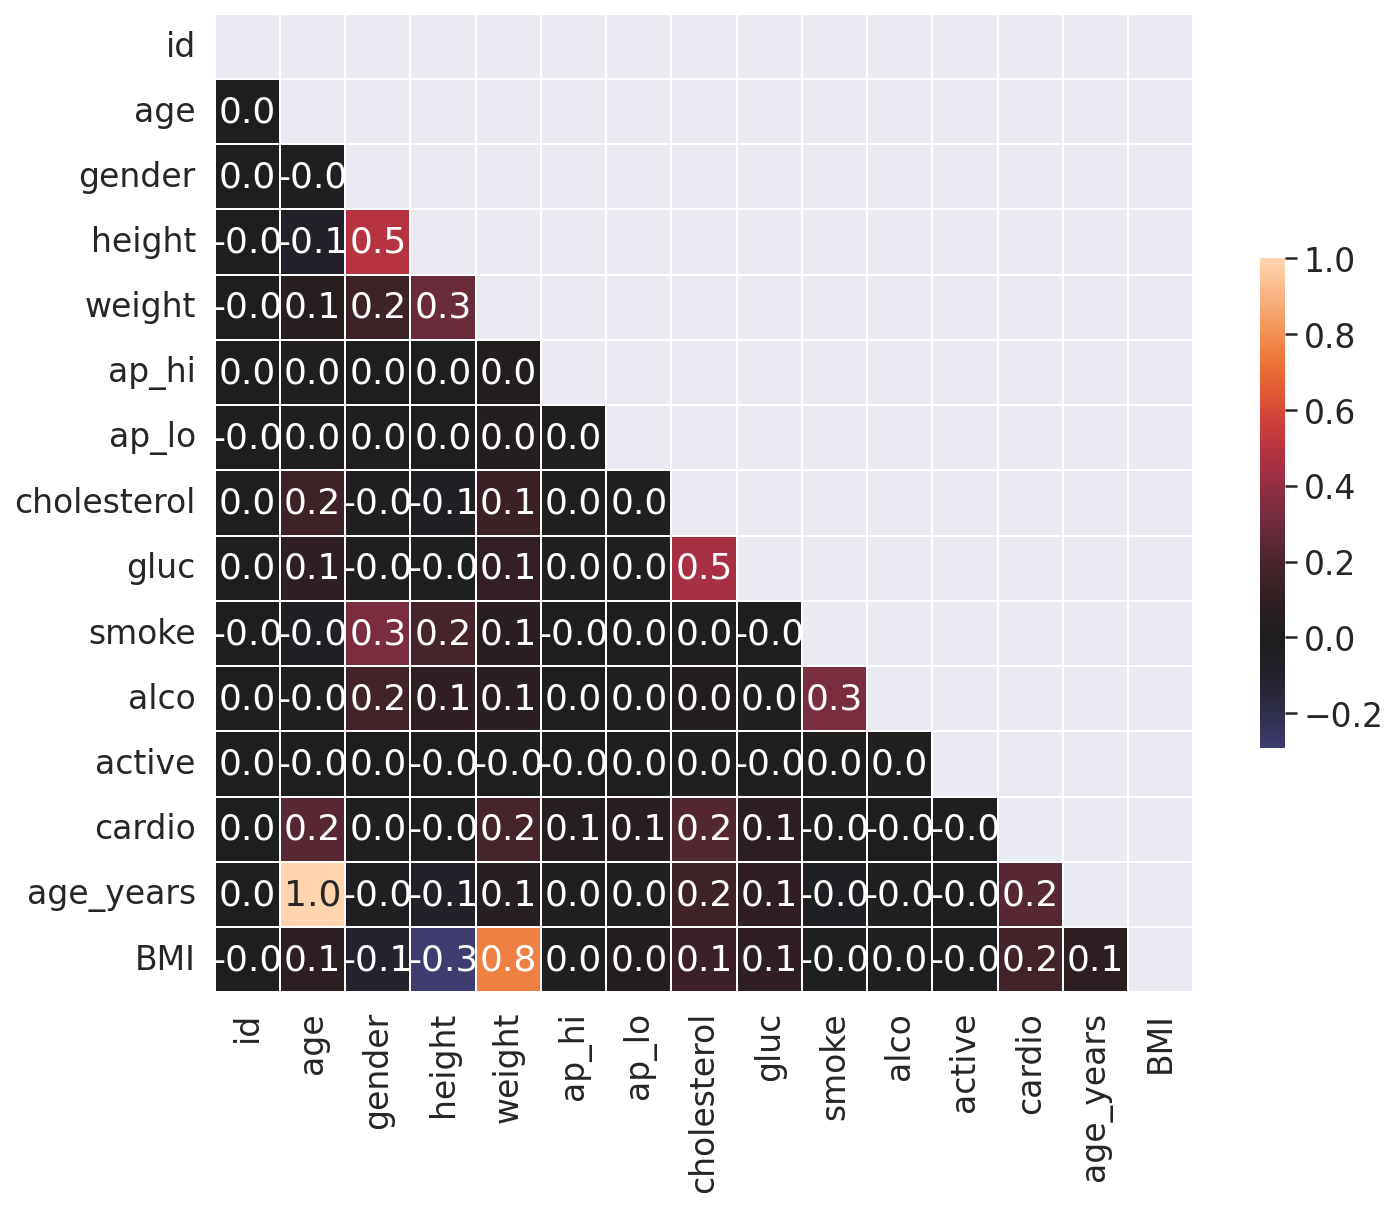

In [81]:
# Calculate the correlation matrix
df = filtered_df.copy()

corr = df.corr(method="pearson")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

#### 2.2. Height distribution of men and women

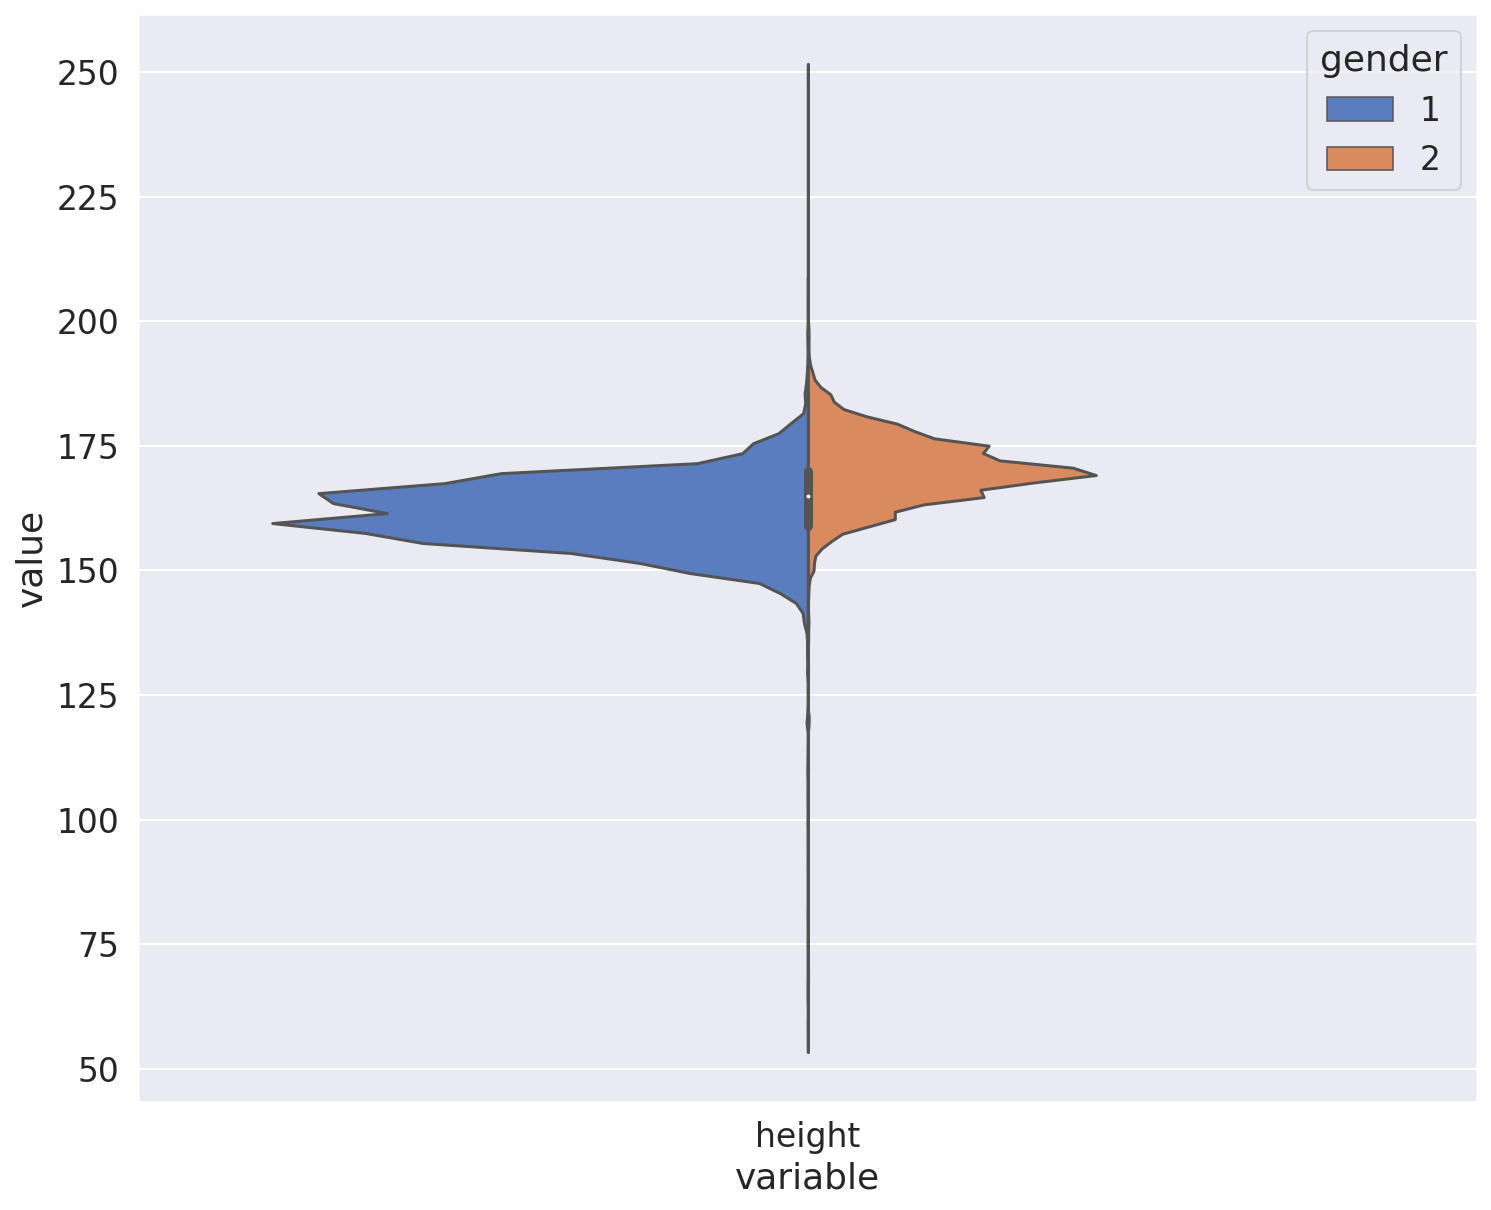

In [82]:
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False,
)

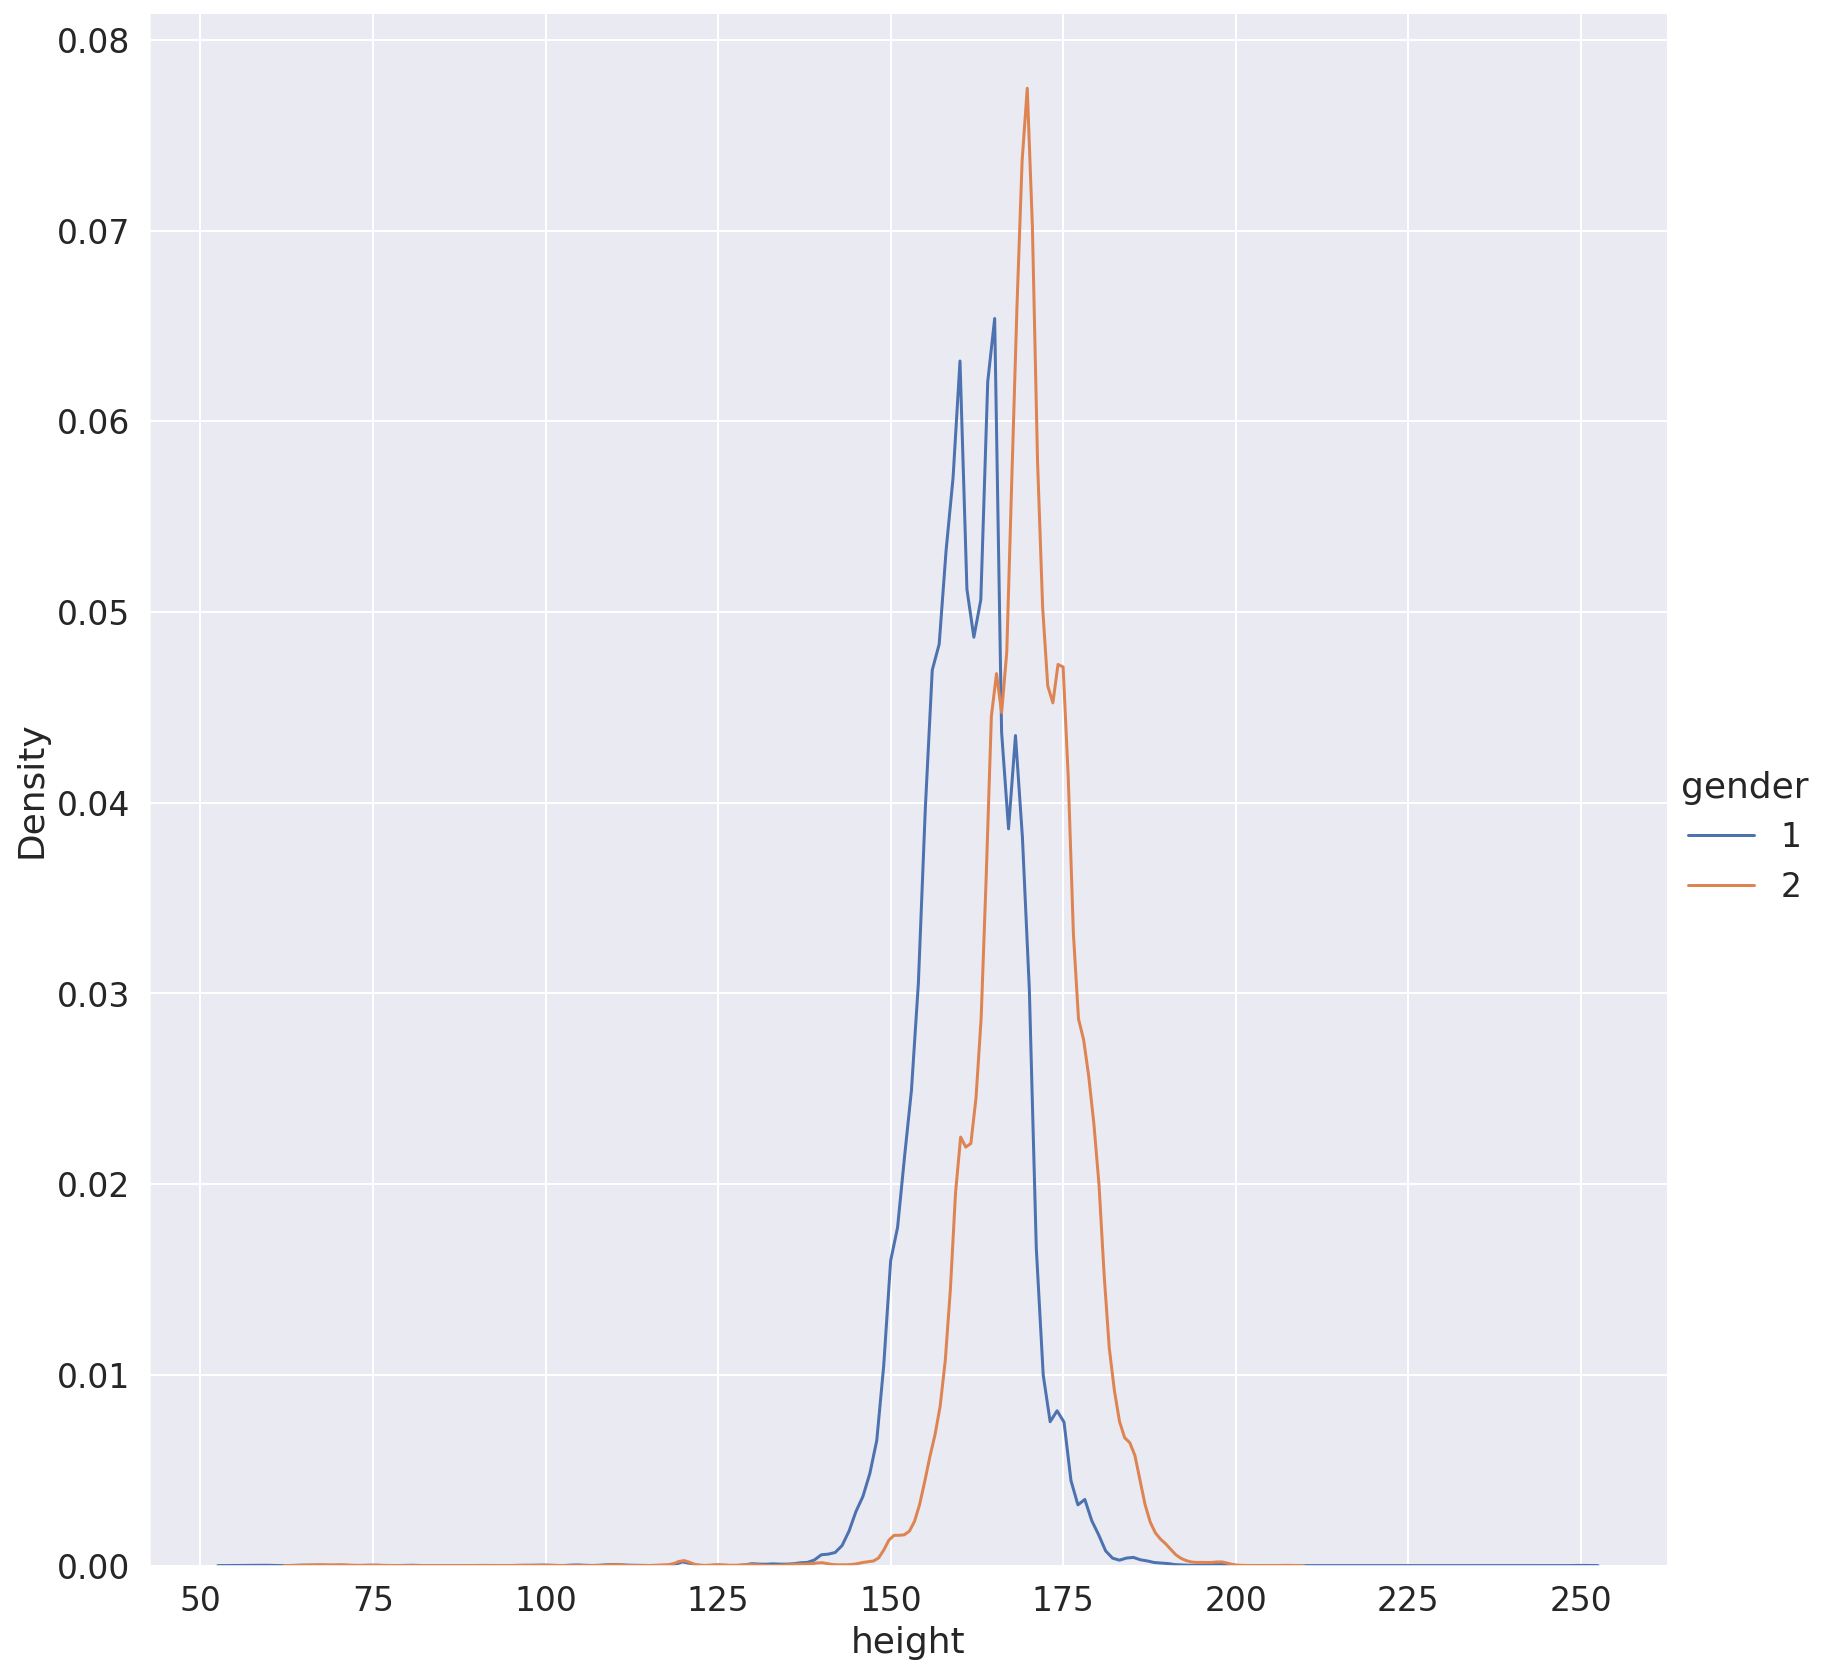

In [83]:
sns.FacetGrid(df, hue="gender", size=12).map(sns.kdeplot, "height").add_legend();

#### 2.3. Rank correlation

Question 2.2. (1 point). Which pair of features has the strongest Spearman rank correlation?

1. Height, Weight

2. Age, Weight

3. Cholesterol, Gluc

4. Cardio, Cholesterol

5. Ap_hi, Ap_lo (true)

6. Smoke, Alco

Question 2.3. (1 point). Why do these features have strong rank correlation?

1. Inaccuracies in the data (data acquisition errors).

2. Relation is wrong, these features should not be related.

3. Nature of the data. (true)

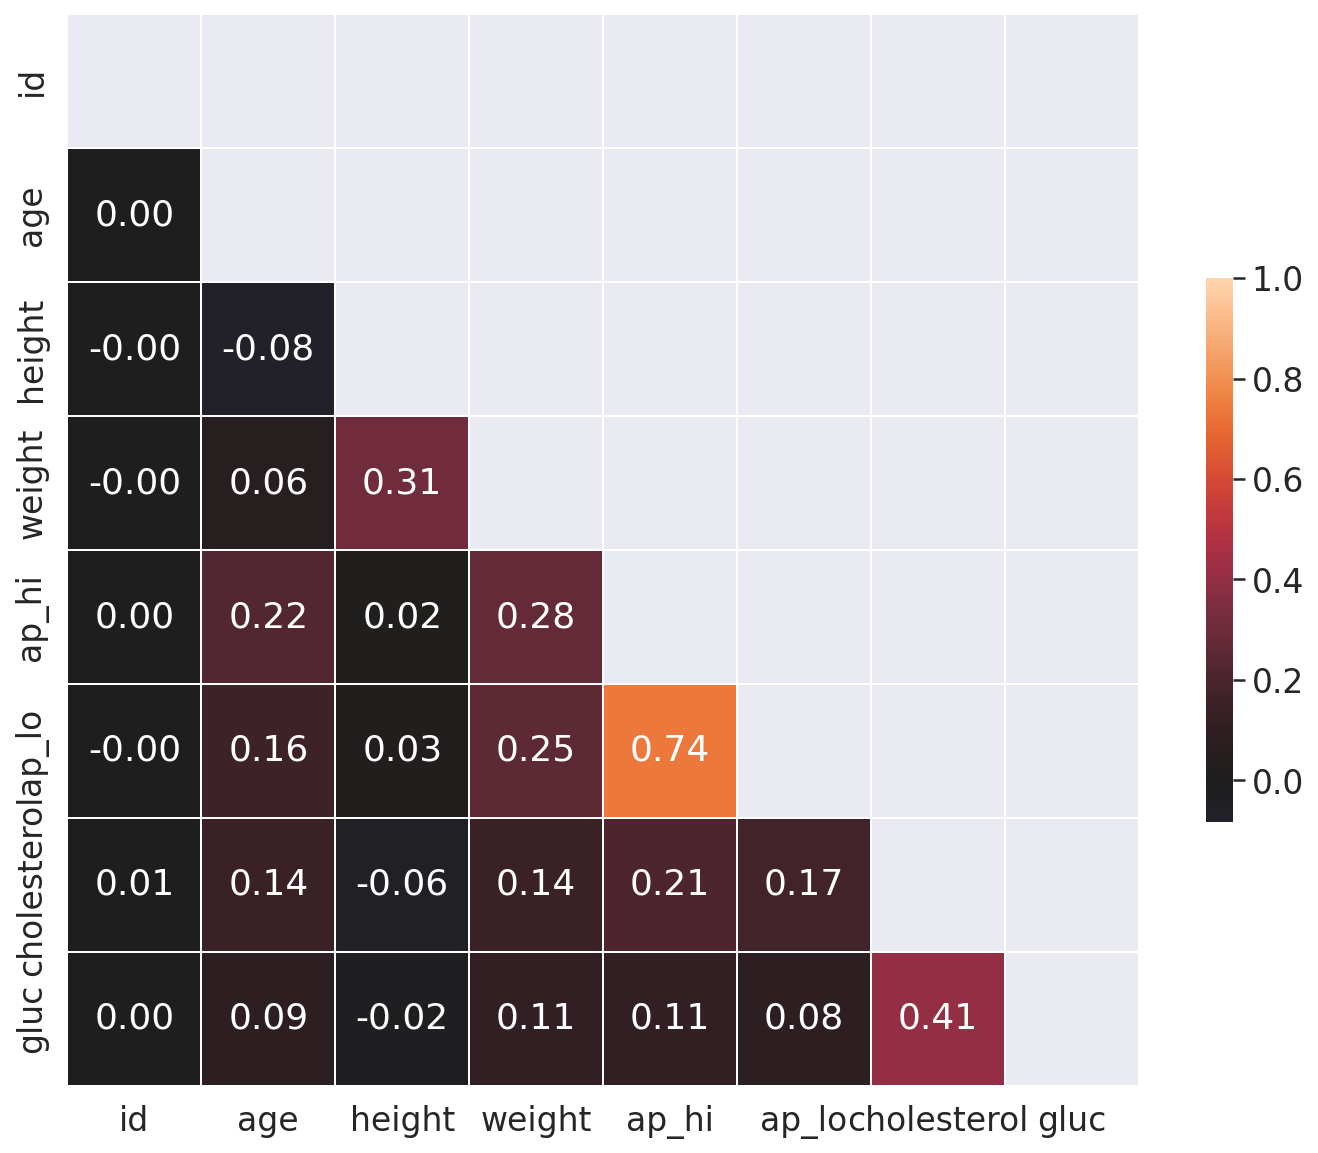

In [84]:
# Calculate the correlation matrix
corr = df[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

#### 2.4. Age

Question 2.4. (1 point). What is the smallest age at which the number of people with CVD outnumbers the number of people without CVD?

1. 44

2. 55 (true)

3. 64

4. 70

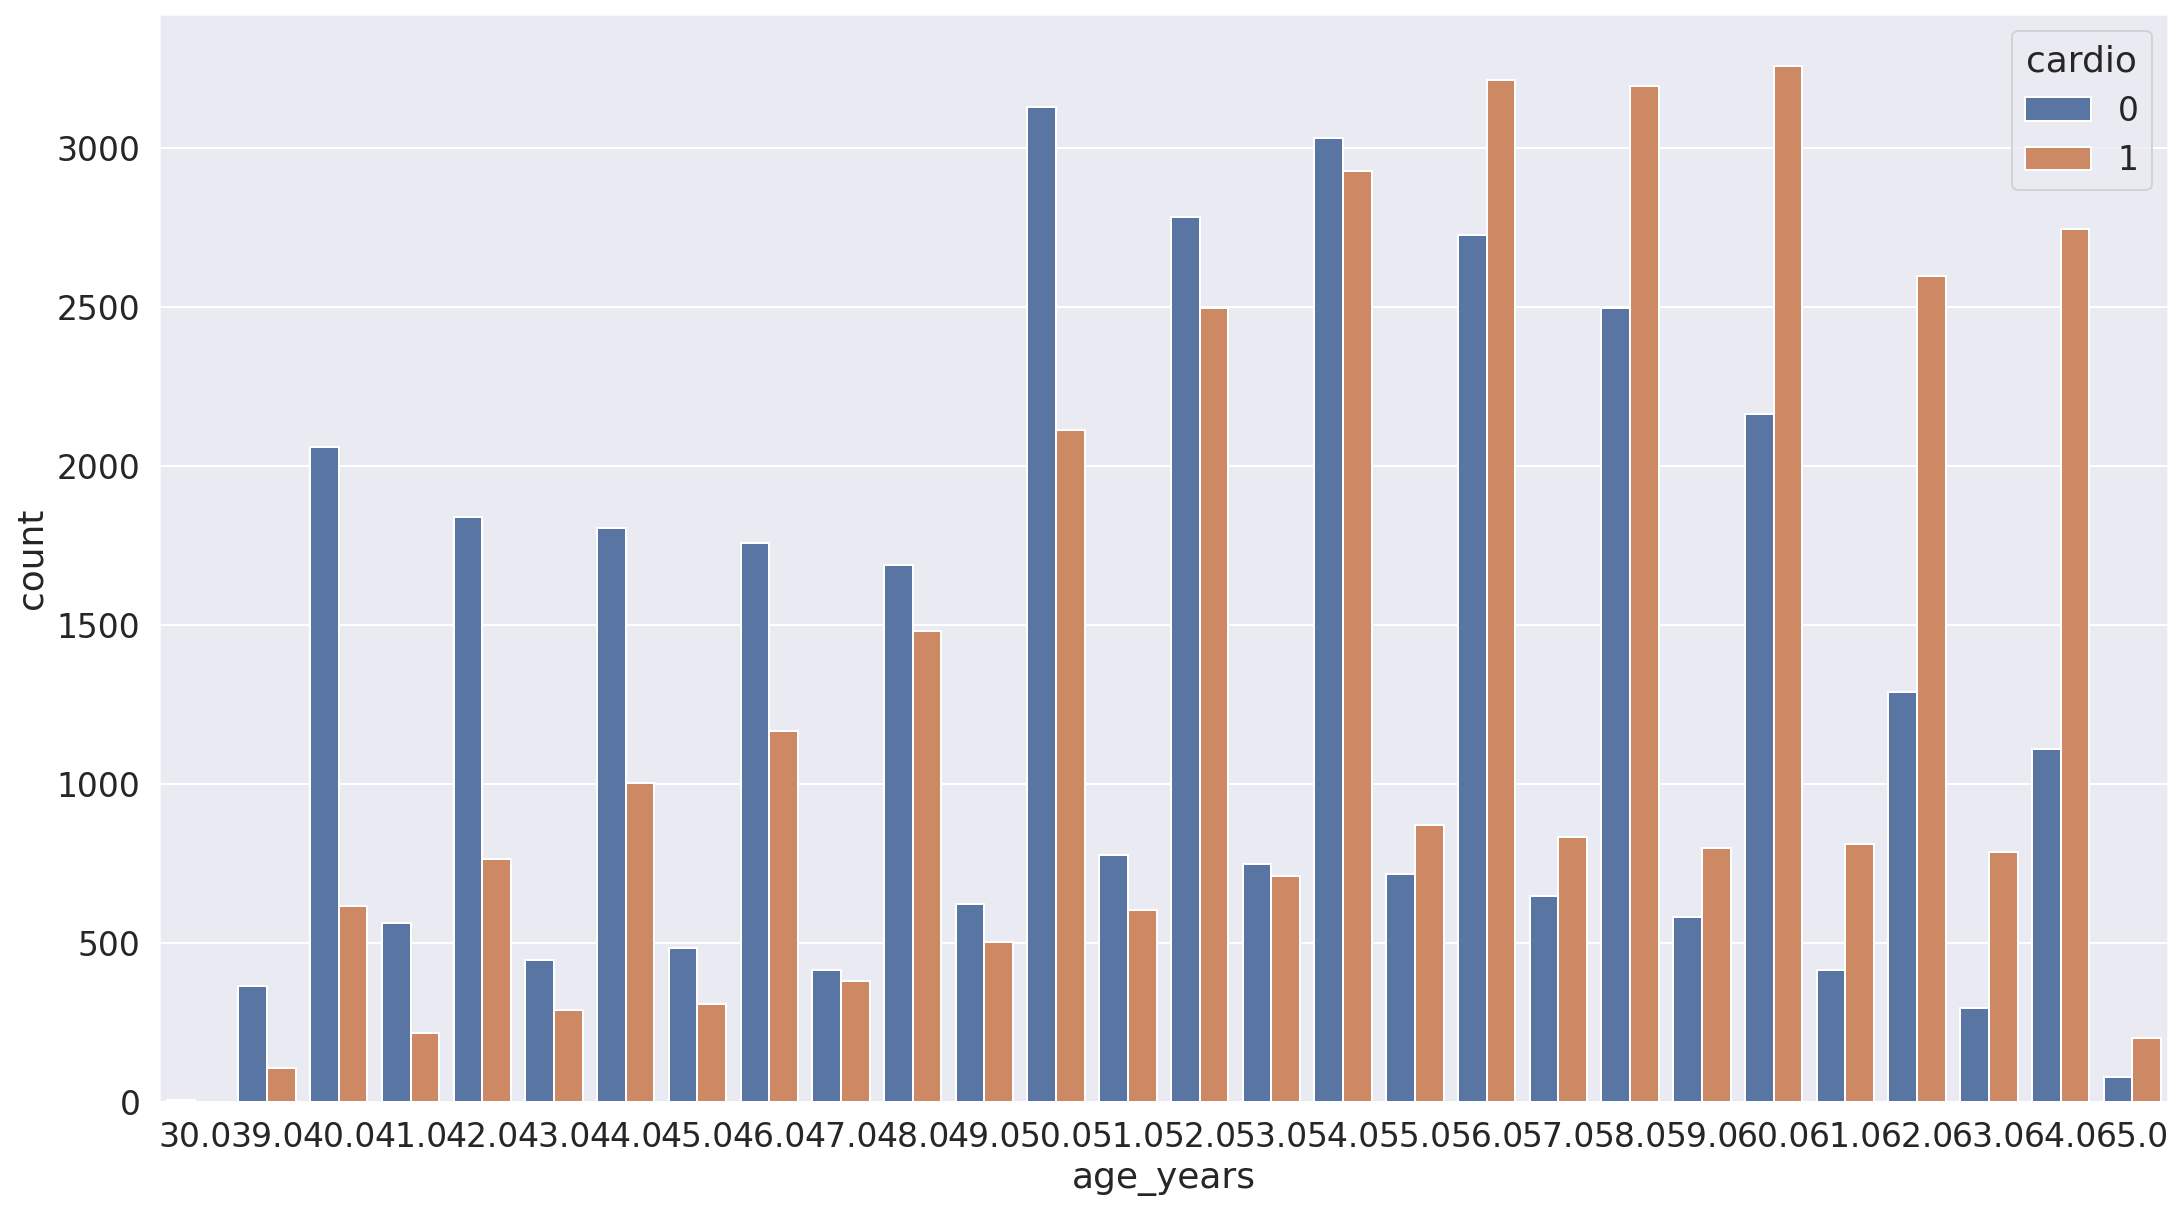

In [87]:
plt.figure(figsize=(18, 10))
sns.countplot(x="age_years", hue="cardio", data=df);